En este proyecto usaremos un Dataset con 27.075 juegos en Steam, la popular plataforma de juegos de PC. Esta lista está actualizada desde el inicio hasta Abril de 2019.

Responderemos las siguientes preguntas:
1. Cual es el TOP10 de juegos más jugados?
2. Cuál es el género de videojuegos más vendido?
3. Qué géneros tienen mejores reviews de media?
4. Cuánto ha ganado el desarrollador que más juegos ha vendido?
5. Cómo afecta a las reviews que un juego sea Early Access?
6. Cuál es el desarrollador (o desarrolladores) que más tipos de juego y cantidad ha desarrollado?
7. En qué mes, desde que tenemos datos, se han publicado más juegos?
8. Cuántas horas se juega de media a cada tipo de juego mensualmente?
9. Los juegos Free to Play tienen mejores o peores reviews?
10. Cómo ha evolucionado el número de achievements (trofeos) por juego?


# Importando librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Consiguiendo los datos

## Descomprimir el archivo

In [2]:
#Usando la librería ZipFile para poder descomprimir el archivo .zip
from zipfile import ZipFile
steam_zip = ZipFile('C:/Users/hpser/OneDrive/Desktop/SteamDataset-220424-201858.zip')

In [3]:
#Con .filelist se puede observar la información sobre cada archivo dentro del archivo ZIP
steam_zip.filelist

[<ZipInfo filename='steam.csv' compress_type=deflate external_attr=0x20 file_size=3425223 compress_size=979195>]

## Construir DataFrame

In [4]:
#Se creerá un DataFrame leyendo los datos del archivo .csv
df = pd.read_csv(steam_zip.open('steam.csv'), index_col=[0])
df.head()

,name,release_date,developer,achievements,positive_ratings,negative_ratings,avg_hours_per_user,price,sells,action,adventure,rpg,simulation,strategy,racing,free_to_play,early_access
0,Counter-Strike,2000-11-01,Valve,0,124534,3339,17612,7.19€,15000000.0,True,False,False,False,False,False,False,False
1,Team Fortress Classic,1999-04-01,Valve,0,3318,633,277,3.99€,7500000.0,True,False,False,False,False,False,False,False
2,Day of Defeat,2003-05-01,Valve,0,3416,398,187,3.99€,7500000.0,True,False,False,False,False,False,False,False
3,Deathmatch Classic,2001-06-01,Valve,0,1273,267,258,3.99€,7500000.0,True,False,False,False,False,False,False,False
4,Half-Life: Opposing Force,1999-11-01,Gearbox Software,0,5250,288,624,3.99€,7500000.0,True,False,False,False,False,False,False,False


# Limpieza y manipulación de datos

## Quitar datos duplicados o irrelevantes

In [5]:
# Resumen del DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27103 entries, 0 to 27102
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                27103 non-null  object 
 1   release_date        27103 non-null  object 
 2   developer           27102 non-null  object 
 3   achievements        27103 non-null  int64  
 4   positive_ratings    27103 non-null  int64  
 5   negative_ratings    27103 non-null  int64  
 6   avg_hours_per_user  27103 non-null  int64  
 7   price               27103 non-null  object 
 8   sells               27103 non-null  float64
 9   action              27103 non-null  bool   
 10  adventure           27103 non-null  bool   
 11  rpg                 27103 non-null  bool   
 12  simulation          27103 non-null  bool   
 13  strategy            27103 non-null  bool   
 14  racing              27103 non-null  bool   
 15  free_to_play        27103 non-null  bool   
 16  early_acc

In [6]:
#Se verifica si existe filas duplicadas
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
27098     True
27099     True
27100     True
27101     True
27102     True
Length: 27103, dtype: bool

In [7]:
df.duplicated().unique()

array([False,  True])

In [8]:
df.duplicated().value_counts()

False    27075
True        28
Name: count, dtype: int64

In [9]:
df = df.dropna() #Eliminamos todas las filas que contienen al menos un valor nulo (NaN)
df = df.drop_duplicates() #Eliminamos las filas duplicadas del DataFrame

In [10]:
#Verificamos si hay filas duplicadas en el DataFrame
df.duplicated().any()

False

In [11]:
#Contamos la cantidad de filas duplicadas y no duplicadas en el DataFrame
df.duplicated().value_counts()

False    27074
Name: count, dtype: int64

## Arreglar errores estructurales

In [12]:
#Ver los nombres de las columnas del DataFrame
df.columns

Index(['name', 'release_date', 'developer', 'achievements', 'positive_ratings',
       'negative_ratings', 'avg_hours_per_user', 'price', 'sells', 'action',
       'adventure', 'rpg', 'simulation', 'strategy', 'racing', 'free_to_play',
       'early_access'],
      dtype='object')

### Definir errores


1. Columna "price" quitarle el simbolo de euros, y renombrar la columna como "price (EUR)".
2. Las columnas de tipo String, deben estar en miniscúlas.
3. Arreglar la columna "release_date".

__*Arreglar la columna "price"*__

In [13]:
#Observaremos los valores de la columna 'price'
df['price'].unique()

array(['7.19€', '3.99€', '0.0€', '5.79€', '5.99€', '14.99€', '6.99€',
       '22.99€', '4.99€', '10.99€', '2.99€', '4.29€', '12.99€', '2.49€',
       '9.99€', '1.99€', '15.99€', '3.49€', '24.99€', '8.59€', '7.99€',
       '4.49€', '4.25€', '5.59€', '25.99€', '8.99€', '4.79€', '13.99€',
       '8.29€', '9.29€', '19.99€', '1.79€', '16.99€', '8.69€', '7.49€',
       '0.79€', '1.69€', '15.49€', '1.49€', '17.99€', '11.99€', '35.96€',
       '6.49€', '1.59€', '34.99€', '0.99€', '5.19€', '2.09€', '29.99€',
       '19.98€', '2.79€', '2.89€', '34.95€', '12.49€', '11.39€', '4.39€',
       '18.99€', '95.99€', '10.59€', '6.19€', '39.99€', '26.99€',
       '30.99€', '6.0€', '23.99€', '52.99€', '33.99€', '12.39€', '8.49€',
       '23.79€', '19.49€', '38.99€', '23.39€', '6.95€', '11.49€',
       '18.74€', '20.99€', '60.99€', '5.49€', '69.99€', '13.49€',
       '78.99€', '17.98€', '27.79€', '27.11€', '75.99€', '44.98€',
       '11.69€', '2.29€', '54.99€', '44.99€', '27.0€', '4.65€', '14.49€',
       '

In [14]:
df['price']

0        7.19€
1        3.99€
2        3.99€
3        3.99€
4        3.99€
         ...  
27070    2.09€
27071    1.69€
27072    3.99€
27073    5.19€
27074    5.19€
Name: price, Length: 27074, dtype: object

In [15]:
# Convertir la columna de precio a tipo numérico (eliminando el símbolo de euro)
df['price'] = df['price'].str.replace('€', '').apply(float)

In [16]:
df['price']

0        7.19
1        3.99
2        3.99
3        3.99
4        3.99
         ... 
27070    2.09
27071    1.69
27072    3.99
27073    5.19
27074    5.19
Name: price, Length: 27074, dtype: float64

In [17]:
# Renombramos la columna 'price' a 'price(EUR)' en el DataFrame
df.rename(columns={'price':'price(EUR)'}).head(1)

,name,release_date,developer,achievements,positive_ratings,negative_ratings,avg_hours_per_user,price(EUR),sells,action,adventure,rpg,simulation,strategy,racing,free_to_play,early_access
0,Counter-Strike,2000-11-01,Valve,0,124534,3339,17612,7.19,15000000.0,True,False,False,False,False,False,False,False


__*Arreglamos las columnas "name" y "developer"*__

In [18]:
#Definimos una lista que contiene las columnas "name" y "developer"
cols = ['name', 'developer']

In [19]:
#Convertir las columnas "name" y "developer" a minúsculas
df[cols] = df[cols].apply(lambda x: x.str.lower())

In [20]:
#Seleccionamos solo las columnas del tipo de objeto (strings)
df.select_dtypes(include=[object])

,name,release_date,developer
0,counter-strike,2000-11-01,valve
1,team fortress classic,1999-04-01,valve
2,day of defeat,2003-05-01,valve
3,deathmatch classic,2001-06-01,valve
4,half-life: opposing force,1999-11-01,gearbox software
...,...,...,...
27070,room of pandora,2019-04-24,shen jiawei
27071,cyber gun,2019-04-23,semyon maximov
27072,super star blast,2019-04-24,entwicklerx
27073,new yankee 7: deer hunters,2019-04-17,yustas game studio


Encontramos que la columna 'release_date' es de tipo string, por lo tanto hay que convertir la columna a tipo datetime.

__*Arreglamos la columna 'release_date'*__

In [21]:
# Convertir la fecha a tipo datetime
df['release_date'] = pd.to_datetime(df['release_date'])

In [22]:
df['release_date']

0       2000-11-01
1       1999-04-01
2       2003-05-01
3       2001-06-01
4       1999-11-01
           ...    
27070   2019-04-24
27071   2019-04-23
27072   2019-04-24
27073   2019-04-17
27074   2019-04-24
Name: release_date, Length: 27074, dtype: datetime64[ns]

## Filtrar outliers 

In [23]:
#Generamos un resumen estadístico del DataFrame
df.describe()

,release_date,achievements,positive_ratings,negative_ratings,avg_hours_per_user,price,sells
count,27074,27074.000000,2.707400e+04,27074.000000,27074.000000,27074.000000,2.707400e+04
mean,2016-12-31 13:48:36.539853824,45.250536,1.000595e+03,211.034904,149.810482,6.078270,1.340951e+05
min,1997-06-30 00:00:00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000e+04
25%,2016-04-04 00:00:00,0.000000,6.000000e+00,2.000000,0.000000,1.690000,1.000000e+04
50%,2017-08-08 00:00:00,7.000000,2.400000e+01,9.000000,0.000000,3.990000,1.000000e+04
75%,2018-06-06 00:00:00,23.000000,1.260000e+02,42.000000,0.000000,7.190000,3.500000e+04
max,2019-05-01 00:00:00,9821.000000,2.644404e+06,487076.000000,190625.000000,421.990000,1.500000e+08
std,NaN,352.676687,1.898907e+04,4285.017477,1827.071657,7.875057,1.328113e+06


## Lidiar con NANs

Verificamos si hay valores nulos en el DataFrame.

In [24]:
#Verificamos si hay al menos un NaN en cada columna
df.isna().any()

name                  False
release_date          False
developer             False
achievements          False
positive_ratings      False
negative_ratings      False
avg_hours_per_user    False
price                 False
sells                 False
action                False
adventure             False
rpg                   False
simulation            False
strategy              False
racing                False
free_to_play          False
early_access          False
dtype: bool

## Validar nuestros datos

In [25]:
#Resumen del DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27074 entries, 0 to 27074
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   name                27074 non-null  object        
 1   release_date        27074 non-null  datetime64[ns]
 2   developer           27074 non-null  object        
 3   achievements        27074 non-null  int64         
 4   positive_ratings    27074 non-null  int64         
 5   negative_ratings    27074 non-null  int64         
 6   avg_hours_per_user  27074 non-null  int64         
 7   price               27074 non-null  float64       
 8   sells               27074 non-null  float64       
 9   action              27074 non-null  bool          
 10  adventure           27074 non-null  bool          
 11  rpg                 27074 non-null  bool          
 12  simulation          27074 non-null  bool          
 13  strategy            27074 non-null  bool          


# EDA

## Cual es el TOP10 de juegos más jugados?

In [26]:
df.head()

,name,release_date,developer,achievements,positive_ratings,negative_ratings,avg_hours_per_user,price,sells,action,adventure,rpg,simulation,strategy,racing,free_to_play,early_access
0,counter-strike,2000-11-01,valve,0,124534,3339,17612,7.19,15000000.0,True,False,False,False,False,False,False,False
1,team fortress classic,1999-04-01,valve,0,3318,633,277,3.99,7500000.0,True,False,False,False,False,False,False,False
2,day of defeat,2003-05-01,valve,0,3416,398,187,3.99,7500000.0,True,False,False,False,False,False,False,False
3,deathmatch classic,2001-06-01,valve,0,1273,267,258,3.99,7500000.0,True,False,False,False,False,False,False,False
4,half-life: opposing force,1999-11-01,gearbox software,0,5250,288,624,3.99,7500000.0,True,False,False,False,False,False,False,False


In [27]:
# Utilizamos el método nlargest() para seleccionar las 10 filas con los valores más altos
# en la columna 'avg_hours_per_user'.
top_10_juegos = df.nlargest(10, 'avg_hours_per_user')[['name', 'avg_hours_per_user']]
top_10_juegos

,name,avg_hours_per_user
9201,the abbey of crime extensum,190625
1478,the banner saga: factions,95245
6014,the secret of tremendous corporation,95242
8969,price,63481
3930,boundless,55204
3969,shroud of the avatar: forsaken virtues,54618
2435,x-plane 11,44169
23409,懒人修仙传,43632
2023,fantasy grounds,43074
8919,screeps,38805


C:\Users\hpser\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 25042 (\N{CJK UNIFIED IDEOGRAPH-61D2}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\hpser\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20154 (\N{CJK UNIFIED IDEOGRAPH-4EBA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\hpser\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20462 (\N{CJK UNIFIED IDEOGRAPH-4FEE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\hpser\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20185 (\N{CJK UNIFIED IDEOGRAPH-4ED9}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\hpser\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20256 (\N{CJK UNIFIED IDEOGRAPH-4F20}) missing from current font.
  fig.canvas.print_figure(bytes_

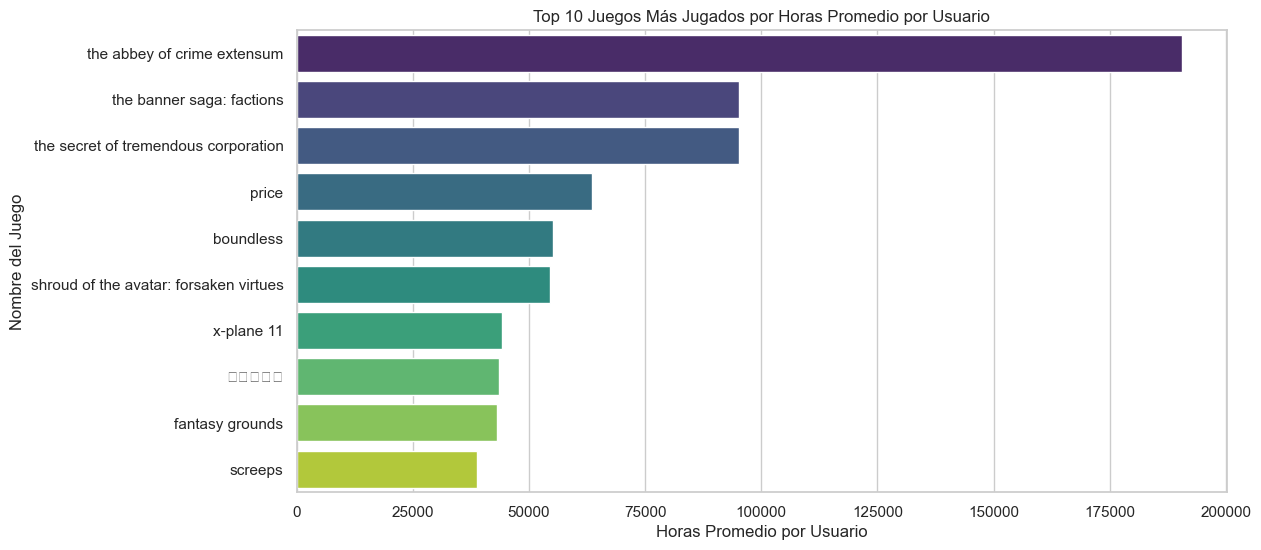

In [28]:
# Configuramos el estilo de Seaborn
sns.set(style="whitegrid")

# Creamos un gráfico de barras
plt.figure(figsize=(12, 6))  # Ajusta el tamaño del gráfico
sns.barplot(x='avg_hours_per_user', y='name', data=top_10_juegos, palette='viridis')

# Añadimos títulos y etiquetas
plt.title('Top 10 Juegos Más Jugados por Horas Promedio por Usuario')
plt.xlabel('Horas Promedio por Usuario')
plt.ylabel('Nombre del Juego')

# Mostramos el gráfico
plt.show()

## Cuál es el género de videojuegos más vendido?

In [29]:
df.head()

,name,release_date,developer,achievements,positive_ratings,negative_ratings,avg_hours_per_user,price,sells,action,adventure,rpg,simulation,strategy,racing,free_to_play,early_access
0,counter-strike,2000-11-01,valve,0,124534,3339,17612,7.19,15000000.0,True,False,False,False,False,False,False,False
1,team fortress classic,1999-04-01,valve,0,3318,633,277,3.99,7500000.0,True,False,False,False,False,False,False,False
2,day of defeat,2003-05-01,valve,0,3416,398,187,3.99,7500000.0,True,False,False,False,False,False,False,False
3,deathmatch classic,2001-06-01,valve,0,1273,267,258,3.99,7500000.0,True,False,False,False,False,False,False,False
4,half-life: opposing force,1999-11-01,gearbox software,0,5250,288,624,3.99,7500000.0,True,False,False,False,False,False,False,False


In [30]:
df.columns

Index(['name', 'release_date', 'developer', 'achievements', 'positive_ratings',
       'negative_ratings', 'avg_hours_per_user', 'price', 'sells', 'action',
       'adventure', 'rpg', 'simulation', 'strategy', 'racing', 'free_to_play',
       'early_access'],
      dtype='object')

In [31]:
#Definimos los géneros presentes en el DataFrame en una variable
generos = ['action', 'adventure', 'rpg', 'simulation', 'strategy', 'racing']

In [32]:
# Creamos una lista para almacenar las filas
ventas_por_genero = []

# Calculamos las ventas totales por género
for genero in generos:
    total_ventas = df[df[genero] == True]['sells'].sum()  # Sumar ventas donde el género es True
    ventas_por_genero.append({'genero': genero, 'ventas': total_ventas})

# Convertimos la lista a un DataFrame
ventas_por_genero_df = pd.DataFrame(ventas_por_genero)

# Encontramos el género más vendido
genero_mas_vendido = ventas_por_genero_df.loc[ventas_por_genero_df['ventas'].idxmax()]

print(f"Género más vendido: {genero_mas_vendido['genero']} con {genero_mas_vendido['ventas']} ventas.")

Género más vendido: action con 2361680000.0 ventas.


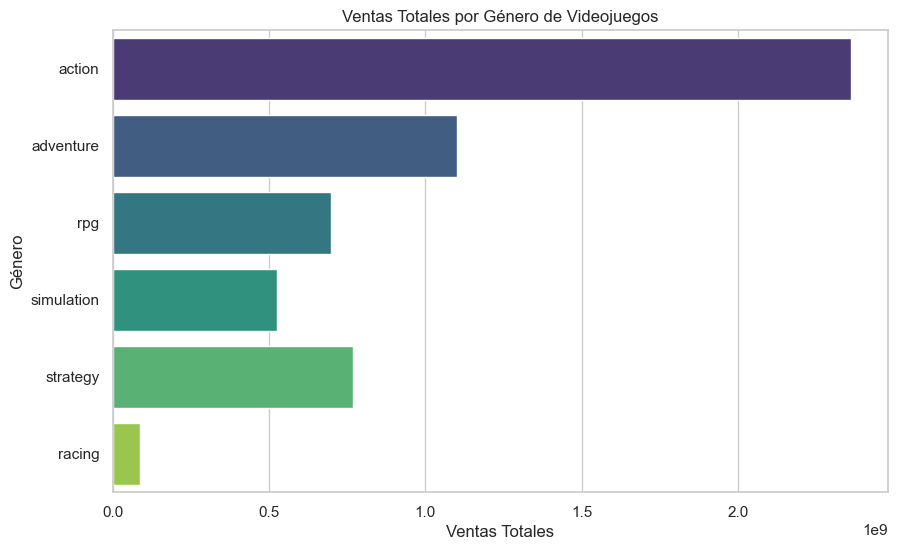

In [33]:
#Configuramos el estilo de Seaborn
sns.set(style="whitegrid")

#Creamos el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='ventas', y='genero', data=ventas_por_genero_df, palette='viridis')

#Añadimos los títulos y etiquetas
plt.title('Ventas Totales por Género de Videojuegos')
plt.xlabel('Ventas Totales')
plt.ylabel('Género')

#Mostramos el gráfico
plt.show()

## Qué géneros tienen mejores reviews de media?

In [34]:
#Crearemos una lista para almacenar las filas
media_reviews_por_genero = []

#Calculamos la media de reviews para cada género
for genero in generos:
    # Filtramos juegos del género y calculamos la media de las calificaciones positivas
    media_reviews = df[df[genero] == True]['positive_ratings'].mean()
    # Añadimos a la lista
    media_reviews_por_genero.append({'genero': genero, 'media_reviews': media_reviews})

# Convertimos la lista a un DataFrame
media_reviews_por_genero_df = pd.DataFrame(media_reviews_por_genero)

# Encontramos el género con mejor review promedio
mejor_genero = media_reviews_por_genero_df.loc[media_reviews_por_genero_df['media_reviews'].idxmax()]

print(f"Género con mejor review promedio: {mejor_genero['genero']} con una media de {mejor_genero['media_reviews']:.2f} ratings positivos.")

Género con mejor review promedio: action con una media de 1582.06 ratings positivos.


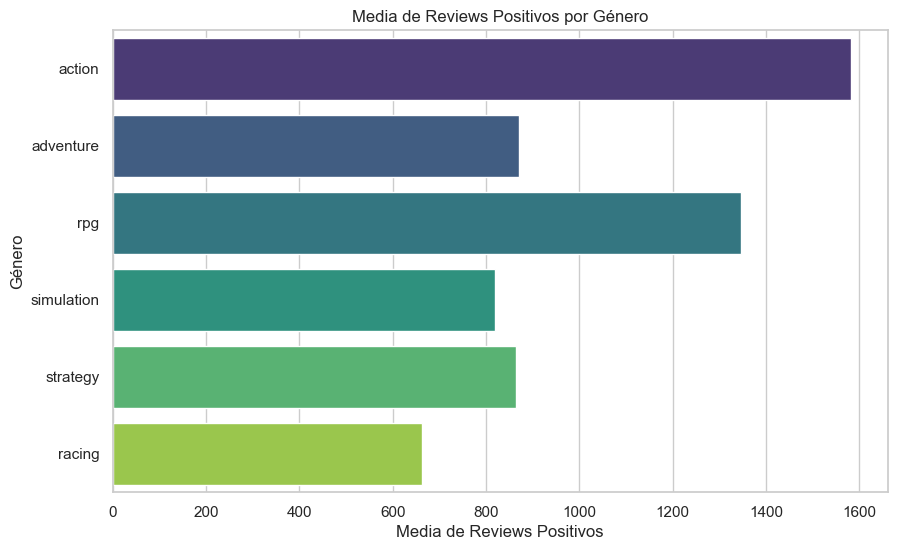

In [35]:
#Configuramos el estilo de Seaborn
sns.set(style="whitegrid")

#Creamos el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='media_reviews', y='genero', data=media_reviews_por_genero_df, palette='viridis')

#Añadimos los títulos y etiquetas
plt.title('Media de Reviews Positivos por Género')
plt.xlabel('Media de Reviews Positivos')
plt.ylabel('Género')

#Mostramos el gráfico
plt.show()

## Cuánto ha ganado el desarrollador que más juegos ha vendido?

In [36]:
# Agrupamos por desarrollador y sumaremos las ventas
ganancias_desarrollador = df.groupby('developer')['sells'].sum()
desarrollador_mas_vendido = ganancias_desarrollador.idxmax()
ganancia_maxima = ganancias_desarrollador.max()
print(f"Desarrollador que más ha vendido: {desarrollador_mas_vendido}, Ganancias: {ganancia_maxima}")

Desarrollador que más ha vendido: valve, Ganancias: 405750000.0


## Cómo afecta a las reviews que un juego sea Early Access?

In [37]:
# Comparamos las calificaciones promedio entre juegos Early Access y no Early Access
early_access_reviews = df.groupby('early_access')['positive_ratings'].mean()
print(early_access_reviews)

early_access
False    1075.569628
True      388.183204
Name: positive_ratings, dtype: float64


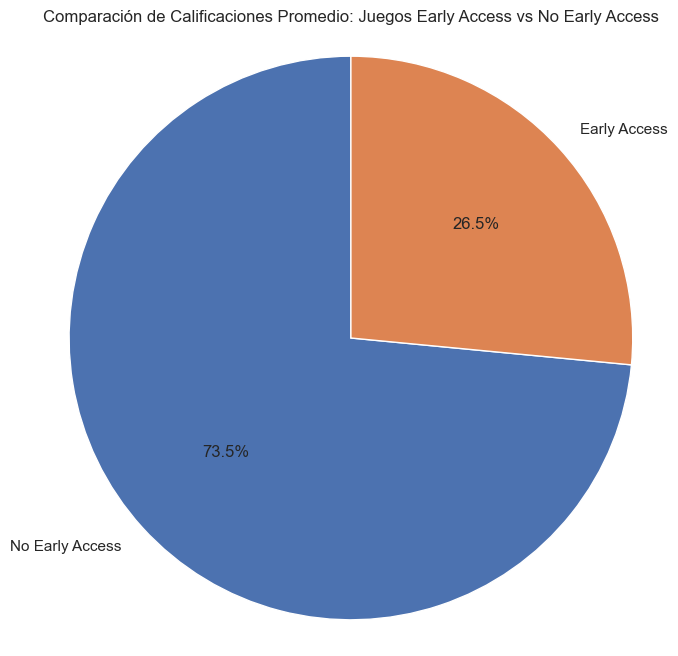

In [38]:
# Calculamos las calificaciones promedio entre juegos Early Access y no Early Access
early_access_reviews = df.groupby('early_access')['positive_ratings'].mean()

# Creamos el gráfico de torta
plt.figure(figsize=(8, 8))  # Ajustar el tamaño del gráfico
plt.pie(early_access_reviews, labels=['No Early Access', 'Early Access'], autopct='%1.1f%%', startangle=90)

# Añadimos un título
plt.title('Comparación de Calificaciones Promedio: Juegos Early Access vs No Early Access')

# Mostramos el gráfico
plt.axis('equal')  # Para que el gráfico sea un círculo
plt.show()

## Cuál es el desarrollador (o desarrolladores) que más tipos de juego y cantidad ha desarrollado?

In [42]:
# Agrupamos por desarrollador y contamos la cantidad total de juegos
desarrolladores_info_df = df.groupby('developer').size().reset_index(name='total_games')

# Encontramos el desarrollador con más juegos
max_developer = desarrolladores_info_df.loc[desarrolladores_info_df['total_games'].idxmax()]

print(f"Desarrollador con más juegos: {max_developer['developer']} "
      f"con {max_developer['total_games']} juegos.")

Desarrollador con más juegos: choice of games con 94 juegos.


## En qué mes, desde que tenemos datos, se han publicado más juegos?

In [43]:
# Extraemos el mes y contamos los juegos publicados por mes
df['month'] = df['release_date'].dt.month_name()
mes_mas_juegos = df['month'].value_counts().idxmax()
print(f"Mes con más juegos publicados: {mes_mas_juegos}")

Mes con más juegos publicados: March


## Cuántas horas se juega de media a cada tipo de juego mensualmente?

In [44]:
#Calculamos las horas jugadas mensualmente por tipo de juego (promedio)
horas_mensuales_tipo_juego = df.groupby('month')['avg_hours_per_user'].mean().reset_index()

horas_mensuales_tipo_juego

,month,avg_hours_per_user
0,April,111.577760
1,August,140.651522
2,December,137.312922
3,February,158.461935
4,January,99.897163
5,July,121.228271
6,June,134.359932
7,March,146.550136
8,May,250.009223
9,November,176.838488


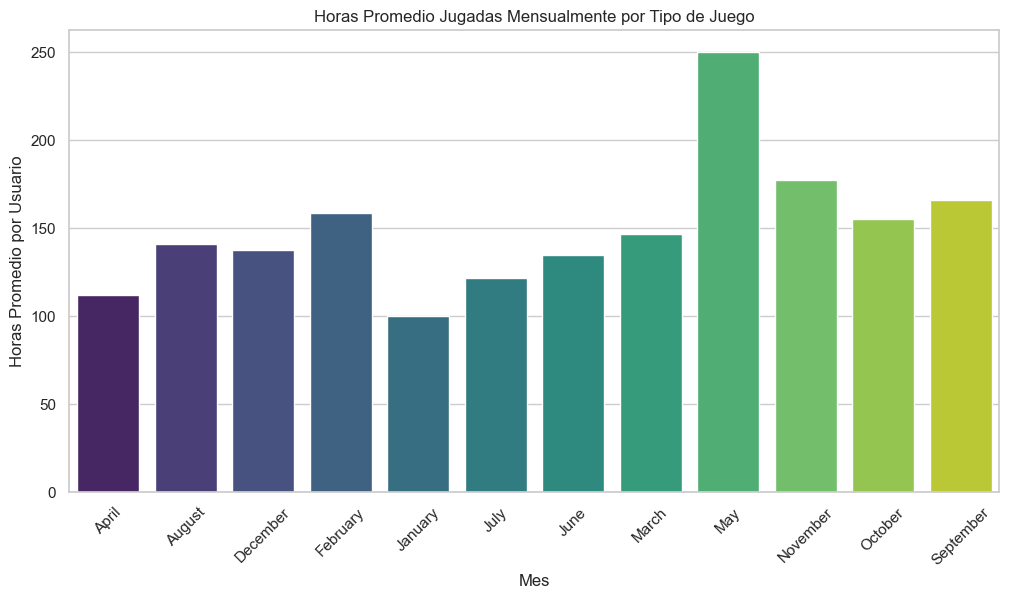

In [45]:
# Configuramos el estilo de Seaborn
sns.set(style="whitegrid")

# Creamos el gráfico de barras
plt.figure(figsize=(12, 6))  # Ajustar el tamaño del gráfico
sns.barplot(x='month', y='avg_hours_per_user', data=horas_mensuales_tipo_juego, palette='viridis')

# Añadimos los títulos y etiquetas
plt.title('Horas Promedio Jugadas Mensualmente por Tipo de Juego')
plt.xlabel('Mes')
plt.ylabel('Horas Promedio por Usuario')

# Rotamos las etiquetas del eje x para mejor legibilidad
plt.xticks(rotation=45)

# Mostramos el gráfico
plt.show()

## Los juegos Free to Play tienen mejores o peores reviews?

In [46]:
#Calculamos las calificaciones promedio entre juegos Free to Play y no Free to Play
reviews_free_to_play = df.groupby('free_to_play')['positive_ratings'].mean()
reviews_free_to_play

free_to_play
False     775.856011
True     4346.627347
Name: positive_ratings, dtype: float64

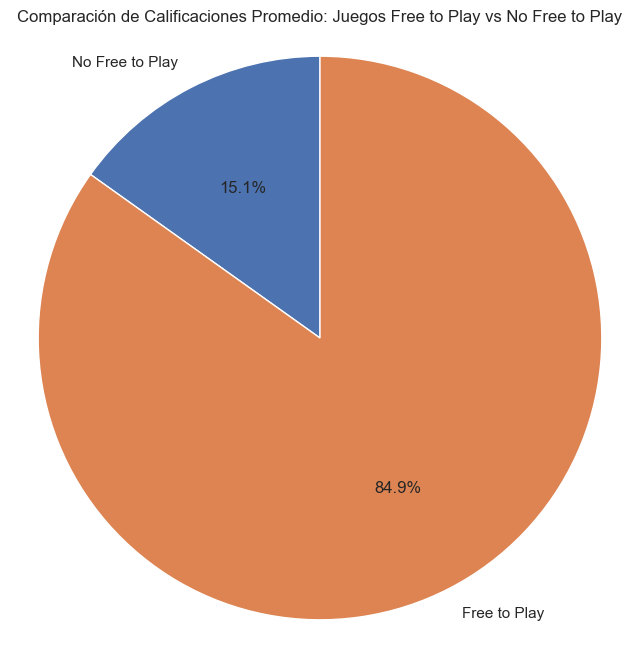

In [47]:
#Creamos el gráfico de torta
plt.figure(figsize=(8, 8))  # Ajustar el tamaño del gráfico
plt.pie(reviews_free_to_play, labels=['No Free to Play', 'Free to Play'], autopct='%1.1f%%', startangle=90)

#Añadimos un título
plt.title('Comparación de Calificaciones Promedio: Juegos Free to Play vs No Free to Play')

# Mostramos el gráfico
plt.axis('equal')  # Para que el gráfico sea un círculo
plt.show()

## Cómo ha evolucionado el número de achievements (trofeos) por juego?

In [48]:
# Extraemos el año de la fecha de lanzamiento
df['year'] = df['release_date'].dt.year

# Agrupamos por año y calculamos el número promedio de achievements
achievement_evolution = df.groupby('year')['achievements'].mean().reset_index()
achievement_evolution

,year,achievements
0,1997,0.000000
1,1998,0.000000
2,1999,0.000000
3,2000,0.000000
4,2001,0.000000
5,2002,0.000000
6,2003,0.000000
7,2004,30.000000
8,2005,0.000000
9,2006,3.020833


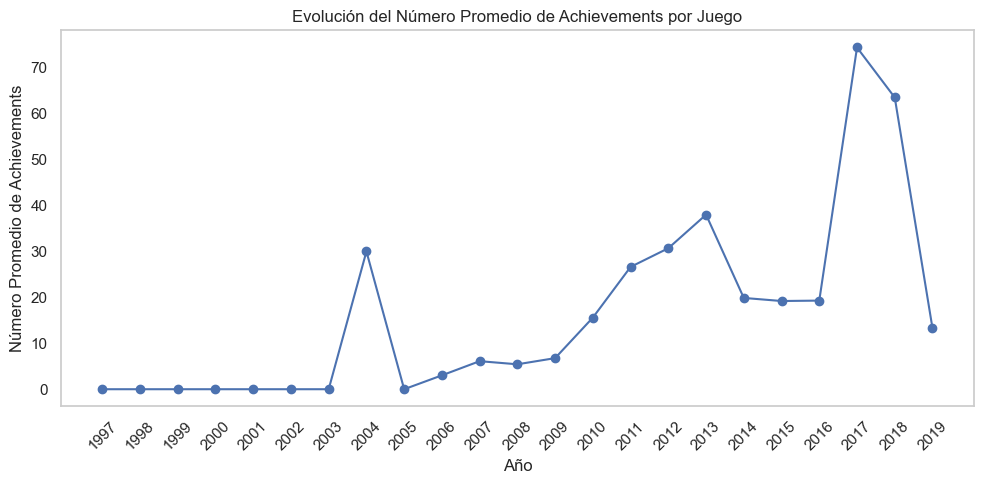

In [49]:
# Creamos el gráfico de líneas
plt.figure(figsize=(10, 5))
plt.plot(achievement_evolution['year'], achievement_evolution['achievements'], marker='o')

# Añadimos los títulos y etiquetas
plt.title('Evolución del Número Promedio de Achievements por Juego')
plt.xlabel('Año')
plt.ylabel('Número Promedio de Achievements')
plt.grid()

# Mostramos el gráfico
plt.xticks(achievement_evolution['year'], rotation=45)
plt.tight_layout()  # Ajustamos el layout para que no se corten las etiquetas
plt.show()